In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Data/PAR2 GFP mutants 2/Experiment'
paths = direcslist(basepath, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

### Straighten

In [16]:
imgs_straight = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs, rois)]
profiles_post = [bounded_mean_2d(s, [0.9, 0.1]) for s in imgs_straight]
profiles_post_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_post]
profiles_ant = [bounded_mean_2d(s, [0.4, 0.6]) for s in imgs_straight]
profiles_ant_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_ant]
profiles_tot = [bounded_mean_2d(s, [0, 1]) for s in imgs_straight]
profiles_tot_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles_tot]

## Profile figs

In [19]:
def func(condition, ax, c, label, profs):
    _profiles = np.fliplr(np.array([p for p, c in zip(profs, conditions) if c == condition])) #/ 10000
    profile_mean = np.mean(_profiles, axis=0)
    profile_std = np.std(_profiles, axis=0)
    ax.plot(0.255 * np.linspace(-25, 25, 500), profile_mean, c=c, label=label)
    ax.fill_between(0.255 * np.linspace(-25, 25, 500), profile_mean - profile_std, profile_mean + profile_std, 
                   color=c, alpha=0.2)
    
    ax.axhline(1, linestyle='--', c='0.8', linewidth=1, zorder=0)
    ax.legend(fontsize=7, frameon=False)
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xlabel('Position (μm)')
    ax.set_ylabel('Intensity (a.u)')
    ax.set_ylim(0, 4)
    fig.set_size_inches(2.5, 2.5)
    fig.tight_layout()

#### Polarised, posterior

<IPython.core.display.Javascript object>


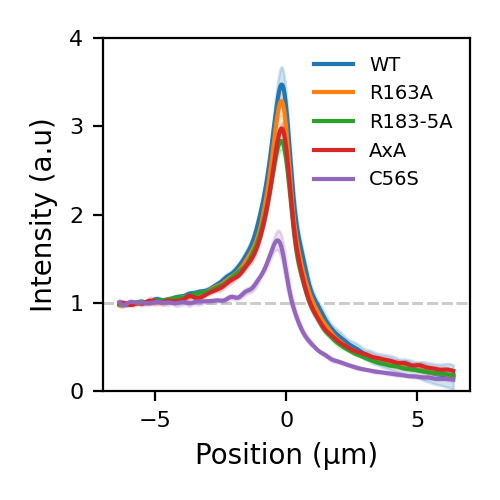

In [20]:
fig, ax = plt.subplots()
func('kk1273', ax, 'tab:blue', 'WT', profiles_post_norm)
func('nwg190', ax, 'tab:orange', 'R163A', profiles_post_norm)
func('nwg192', ax, 'tab:green', 'R183-5A', profiles_post_norm)
func('nwg66', ax, 'tab:red', 'AxA', profiles_post_norm)
func('nwg214', ax, 'tab:purple', 'C56S', profiles_post_norm)

#### Polarised, anterior

<IPython.core.display.Javascript object>


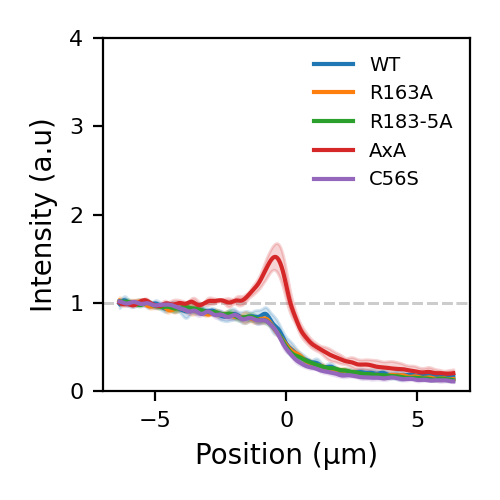

In [21]:
fig, ax = plt.subplots()
func('kk1273', ax, 'tab:blue', 'WT', profiles_ant_norm)
func('nwg190', ax, 'tab:orange', 'R163A', profiles_ant_norm)
func('nwg192', ax, 'tab:green', 'R183-5A', profiles_ant_norm)
func('nwg66', ax, 'tab:red', 'AxA', profiles_ant_norm)
func('nwg214', ax, 'tab:purple', 'C56S', profiles_ant_norm)

#### Uniform, total

<IPython.core.display.Javascript object>


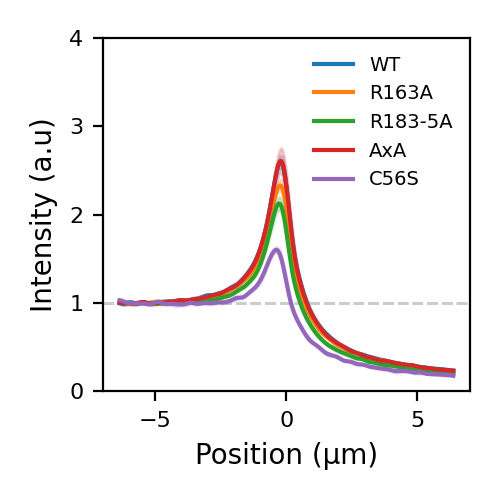

In [22]:
fig, ax = plt.subplots()
func('nwg123', ax, 'tab:blue', 'WT', profiles_tot_norm)
func('nwg218', ax, 'tab:orange', 'R163A', profiles_tot_norm)
func('nwg217', ax, 'tab:green', 'R183-5A', profiles_tot_norm)
func('nwg178', ax, 'tab:red', 'AxA', profiles_tot_norm)
func('nwg222', ax, 'tab:purple', 'C56S', profiles_tot_norm)

#### Uniform posterior

<IPython.core.display.Javascript object>


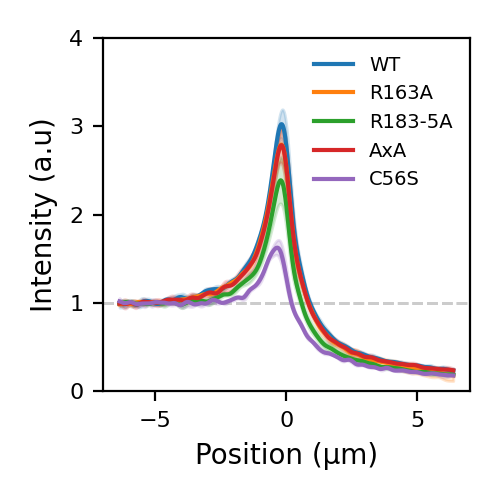

In [23]:
fig, ax = plt.subplots()
func('nwg123', ax, 'tab:blue', 'WT', profiles_post_norm)
func('nwg218', ax, 'tab:orange', 'R163A', profiles_post_norm)
func('nwg217', ax, 'tab:green', 'R183-5A', profiles_post_norm)
func('nwg178', ax, 'tab:red', 'AxA', profiles_post_norm)
func('nwg222', ax, 'tab:purple', 'C56S', profiles_post_norm)

#### Uniform anterior

<IPython.core.display.Javascript object>


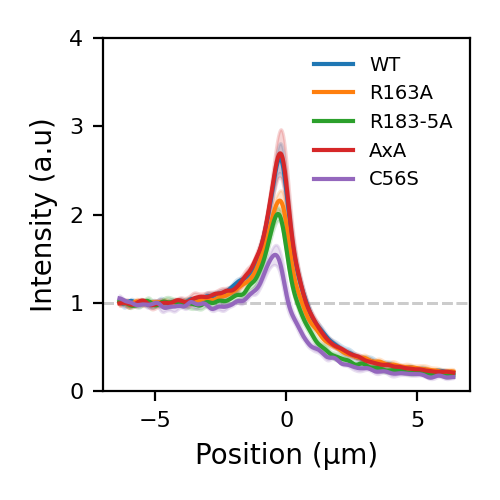

In [24]:
fig, ax = plt.subplots()
func('nwg123', ax, 'tab:blue', 'WT', profiles_ant_norm)
func('nwg218', ax, 'tab:orange', 'R163A', profiles_ant_norm)
func('nwg217', ax, 'tab:green', 'R183-5A', profiles_ant_norm)
func('nwg178', ax, 'tab:red', 'AxA', profiles_ant_norm)
func('nwg222', ax, 'tab:purple', 'C56S', profiles_ant_norm)

## Panel figs

In [50]:
def func_panels(condition, ax, c, label, profs):
    _profiles = np.fliplr(np.array([p for p, c in zip(profs, conditions) if c == condition])) #/ 10000
    profile_mean = np.mean(_profiles, axis=0)
    profile_std = np.std(_profiles, axis=0)
    ax.plot(0.255 * np.linspace(-25, 25, 500), profile_mean, c=c, label=label)
    ax.fill_between( 0.255 * np.linspace(-25, 25, 500), profile_mean - profile_std, profile_mean + profile_std, 
                   color=c, alpha=0.2)
    
    ax.axhline(1, linestyle='--', c='0.8', linewidth=1, zorder=0)
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xlabel('Position (μm)', fontsize=9)
    ax.set_yticks([0, 1, 2, 3, 4])
    ax.set_yticklabels(['', '', '', '', ''])
    ax.set_ylim(0, 3)

#### Polarised posterior

In [51]:
# fig, ax = plt.subplots(1, 5)
# func_panels('kk1273', ax[0], 'tab:blue', 'WT', profiles_post_norm)
# func_panels('nwg190', ax[1], 'tab:orange', 'R163A', profiles_post_norm)
# func_panels('nwg192', ax[2], 'tab:green', 'R183-5A', profiles_post_norm)
# func_panels('nwg66', ax[3], 'tab:red', 'AxA', profiles_post_norm)
# func_panels('nwg214', ax[4], 'tab:purple', 'C56S', profiles_post_norm)
# fig.set_size_inches(7, 2)
# fig.tight_layout()
# fig.subplots_adjust(wspace=0.1)
# # fig.savefig('Figs/profiles_pol_panels.png', dpi=600, transparent=True)

#### Uniform total

<IPython.core.display.Javascript object>


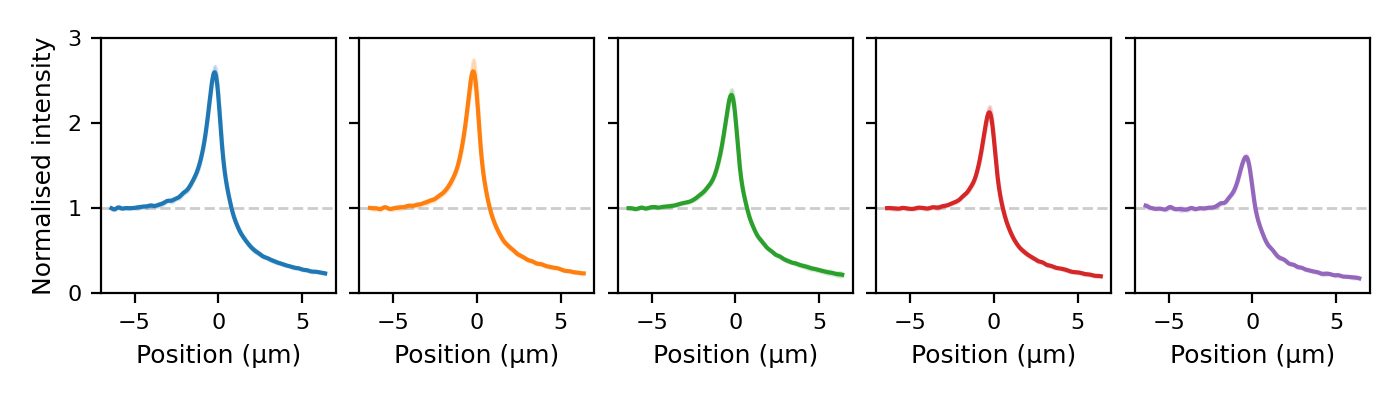

In [52]:
fig, ax = plt.subplots(1, 5)
func_panels('nwg123', ax[0], 'tab:blue', 'WT', profiles_tot_norm)
func_panels('nwg178', ax[1], 'tab:orange', 'AxA', profiles_tot_norm)
func_panels('nwg218', ax[2], 'tab:green', 'R163A', profiles_tot_norm)
func_panels('nwg217', ax[3], 'tab:red', 'R183-5A', profiles_tot_norm)
func_panels('nwg222', ax[4], 'tab:purple', 'C56S', profiles_tot_norm)
ax[0].set_yticks([0, 1, 2, 3])
ax[0].set_yticklabels([0, 1, 2, 3])
ax[0].set_ylabel('Normalised intensity', fontsize=9)
fig.set_size_inches(7, 2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
fig.savefig('Figs/profiles_uni_panels.png', dpi=600, transparent=True)